In [32]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import pandas as pd
import os
import numpy as np
import glob
import scipy

from mpl_toolkits.mplot3d import Axes3D
import ROOT


In [33]:

uni = "khu2_pid_elec1_mu0_64_8h_100n_15l_one_gpu_scheduler" 

path = "/home/chyoo/work/KNO_reconstruction/KNO_pid/result/*"+uni +"*/*"+uni +".csv"

pred_path = glob.glob(path)
pred_list = [file for file in pred_path if file.endswith(".csv")]

In [34]:
df = pd.read_csv(pred_list[0])

In [35]:
pred = np.array(df['prediction']).reshape(-1,1)
label = np.array(df['label']).reshape(-1,1)

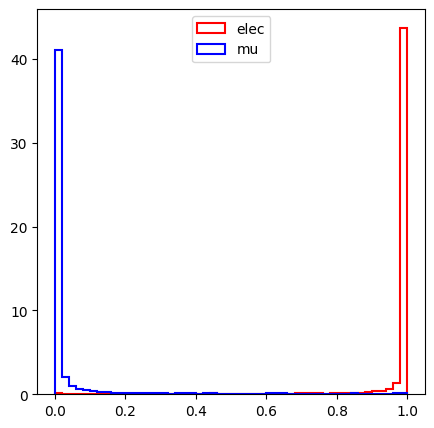

In [70]:
plt.rcParams['figure.figsize'] = (5, 5)
plt.hist(pred[label==1],bins=50,density=True,histtype='step',color='red',linewidth=1.5,label='elec')
plt.hist(pred[label==0],bins=50,density=True,histtype='step',color='blue',linewidth=1.5,label='mu')
plt.legend(loc='upper center')
plt.show()

In [38]:
list_range = np.arange(0,1,0.001)
for i in range(len(list_range)):
    a = len(np.array(pred[label==1])[np.array(pred[label==1])>list_range[i]])/len(np.array(pred[label==1]))
#     print(list_range[i])
    
    if (a > 0.99):
     
        eff_99 = list_range[i]
        continue
        
    if (a > 0.95):
        
        eff_95 = list_range[i]
        continue
        
    if (a > 0.90):
       
        eff_90 = list_range[i]
        continue
    

In [53]:
eff_50_elec = len(np.array(pred[label==1])[np.array(pred[label==1])>0.5])/len(np.array(pred[label==1]))
# print(eff_50_ME)
eff_50_mu = len(np.array(pred[label==0])[np.array(pred[label==0])>0.5])/len(np.array(pred[label==0]))
# print(eff_50_FN)
# eff_50_elec = len(np.array(pred[label==1]))*len(np.array(pred[label==1])[np.array(pred[label==1])>0.5])/len(np.array(pred[label==1]))
# # print(num_50_ME)
# num_50_mu = len(np.array(pred[label==0]))*len(np.array(pred[label==0])[np.array(pred[label==0])>0.5])/len(np.array(pred[label==0]))
# # print(num_50_FN)

In [54]:
eff_99_elec = len(np.array(pred[label==1])[np.array(pred[label==1])>eff_99])/len(np.array(pred[label==1]))
# print(eff_99_ME)
eff_99_mu = len(np.array(pred[label==0])[np.array(pred[label==0])>eff_99])/len(np.array(pred[label==0]))
# print(eff_99_FN)
# eff_99_elec = len(np.array(pred[label==1]))*len(np.array(pred[label==1])[np.array(pred[label==1])>eff_99])/len(np.array(pred[label==1]))
# # print(num_99_ME)
# num_99_mu = len(np.array(pred[label==0]))*len(np.array(pred[label==0])[np.array(pred[label==0])>eff_99])/len(np.array(pred[label==0]))
# # print(num_99_FN)

In [55]:
eff_95_elec = len(np.array(pred[label==1])[np.array(pred[label==1])>eff_95])/len(np.array(pred[label==1]))
# print(eff_95_ME)
eff_95_mu = len(np.array(pred[label==0])[np.array(pred[label==0])>eff_95])/len(np.array(pred[label==0]))
# print(eff_95_FN)
# eff_95_elec = len(np.array(pred[label==1]))*len(np.array(pred[label==1])[np.array(pred[label==1])>eff_95])/len(np.array(pred[label==1]))
# # print(num_95_ME)
# num_95_mu = len(np.array(pred[label==0]))*len(np.array(pred[label==0])[np.array(pred[label==0])>eff_95])/len(np.array(pred[label==0]))
# # print(num_95_FN)

In [56]:
eff_90_elec = len(np.array(pred[label==1])[np.array(pred[label==1])>eff_90])/len(np.array(pred[label==1]))
# print(eff_90_ME)
eff_90_mu = len(np.array(pred[label==0])[np.array(pred[label==0])>eff_90])/len(np.array(pred[label==0]))
# print(eff_90_FN)
# eff_90_elec = len(np.array(pred[label==1]))*len(np.array(pred[label==1])[np.array(pred[label==1])>eff_90])/len(np.array(pred[label==1]))
# # print(num_90_ME)
# num_90_mu = len(np.array(pred[label==0]))*len(np.array(pred[label==0])[np.array(pred[label==0])>eff_90])/len(np.array(pred[label==0]))
# # print(num_90_FN)

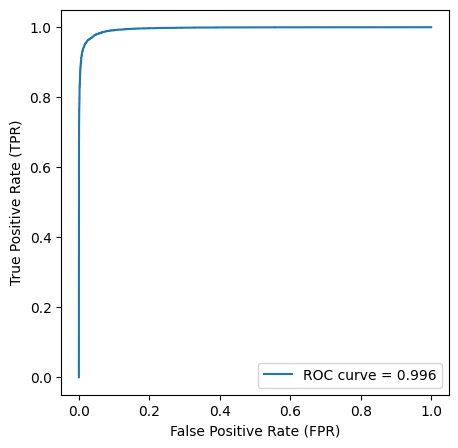

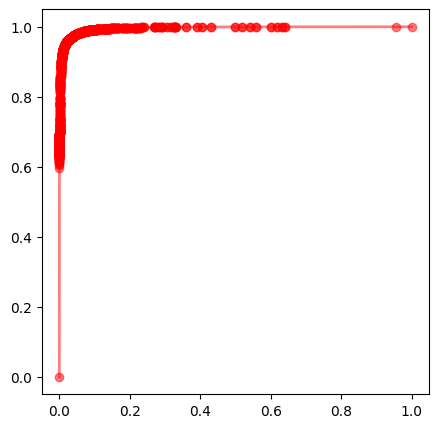

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(label, pred)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve = '+ f"{auc_score:.3f}")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()


# print('AUC:', auc_score)

plt.plot(fpr, tpr, color='r', linewidth=2, marker='o', alpha=0.5)

In [57]:
eff_99_mu

0.08618453056591535

In [58]:
eff_99_elec

0.9900170252282928

In [115]:
list_range = np.arange(0,1,0.00001)
for i in range(len(list_range)):
    a = len(np.array(pred[label==0])[np.array(pred[label==0])>list_range[i]])/len(np.array(pred[label==0]))
#     print(list_range[i])
    
    if (a < 0.005):
     
        eff_mu_05 = list_range[i]
        print(eff_mu_05)
        stop
        

    

0.9710500000000001


NameError: name 'stop' is not defined

In [116]:
eff_mu_05_elec = len(np.array(pred[label==1])[np.array(pred[label==1])>eff_mu_05])/len(np.array(pred[label==1]))

eff_mu_05_mu = len(np.array(pred[label==0])[np.array(pred[label==0])>eff_mu_05])/len(np.array(pred[label==0]))

In [117]:
print(eff_mu_05_elec)
print(eff_mu_05_mu)

0.8898003405045659
0.004945678611966921


In [113]:
eff_mu_05

0.99999

In [108]:
len(np.array(pred[label==0])[np.array(pred[label==0])>0.971])/len(np.array(pred[label==0]))

0.005026755310523755

In [109]:
len(np.array(pred[label==1])[np.array(pred[label==1])>0.971])/len(np.array(pred[label==1]))

0.8898003405045659